In [1]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.4.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.4.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.0


In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 41kB/s 


In [4]:
import csv
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import plot_model
from keras.models import Model
import os
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate






# load all models
model1=load_model("/content/drive/MyDrive/covid19clahe11Resnet_epoch10.h5")
model2=load_model("/content/drive/MyDrive/covid19clahe12Resnet_epoch10.h5")
model3=load_model("/content/drive/MyDrive/covid19clahe13Resnet_epoch10.h5")
model4=load_model("/content/drive/MyDrive/covid19clahe14Resnet_epoch10.h5")
model5=load_model("/content/drive/MyDrive/covid19clahe15Resnet_epoch10.h5")
from keras.models import Sequential

# define ensemble model

# fit stacked model on test dataset
datagen = ImageDataGenerator(
    rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
Xtrain = []
Y1 = []
Y2 = []
Y3 = []
Y4 = []
Y5 = []
from os import walk
import shutil
f0 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/clahe_covid_ct_1.1/0'):

    f0.extend(filenames)
    break

f1 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/clahe_covid_ct_1.1/1'):

    f1.extend(filenames)
    break

f2 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/clahe_covid_ct_1.2/1'):

    f2.extend(filenames)
    break

f3 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/clahe_covid_ct_1.3/1'):

    f3.extend(filenames)
    break

f4 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/clahe_covid_ct_1.4/1'):
    f4.extend(filenames)
    break

f5 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/clahe_covid_ct_1.5/1'):
    f5.extend(filenames)
    break

count =0
with open('/content/drive/MyDrive/inputResnetPred.csv', mode='w') as file:
    filewriter = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    for i in f0:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/clahe_covid_ct_1.1/0/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder/")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(1)
        x.append(0)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)

    for i in f1:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/clahe_covid_ct_1.1/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
            
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)

    for i in f2:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/clahe_covid_ct_1.2/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
           
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)


    for i in f3:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/clahe_covid_ct_1.3/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)

    for i in f4:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/clahe_covid_ct_1.4/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
      
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
    for i in f5:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/clahe_covid_ct_1.5/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
            
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)

1
15%2.jpg
Found 1 images belonging to 1 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Streaming output truncated to the last 5000 lines.
412a0ef653f7cce9591ceee2b0219f_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4731
412.jpg
Found 1 images belonging to 1 classes.
4732
406.jpg
Found 1 images belonging to 1 classes.
4733
42fd4f33b391e8cfcfe9aef0e796e0_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4734
42ce826aeb1f504194f18e4aac1e9b_big_gallery (1).jpeg
Found 1 images belonging to 1 classes.
4735
41e5a06003fc5b8e138609e5abe7a8_big_gallery (1).jpeg
Found 1 images belonging to 1 classes.
4736
42d6309ae42d0f6d15b9ec7b3b81e5_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4737
42.png
Found 1 images belonging to 1 classes.
4738
42ce826aeb1f504194f18e4aac1e9b_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4739
42fb478cf1a82283e4c3beb6bb54d9_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4740
43b8e4defc90de529620a6aed0b608_big_gallery.jpeg
Found 1 images belonging to 1 classes.
4741
4325c477ce4b3702d728be77325c2f_big_gallery (1).jpe

In [8]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1, random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))


0.8953125


In [9]:
import csv
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import plot_model
from keras.models import Model
import os
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate






# load all models
model1=load_model("/content/drive/MyDrive/covid19clahe11Resnet_epoch10.h5")
model2=load_model("/content/drive/MyDrive/covid19clahe12Resnet_epoch10.h5")
model3=load_model("/content/drive/MyDrive/covid19clahe13Resnet_epoch10.h5")
model4=load_model("/content/drive/MyDrive/covid19clahe14Resnet_epoch10.h5")
model5=load_model("/content/drive/MyDrive/covid19clahe15Resnet_epoch10.h5")
from keras.models import Sequential

# define ensemble model

# fit stacked model on test dataset
datagen = ImageDataGenerator(
    rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
Xtrain = []
Y1 = []
Y2 = []
Y3 = []
Y4 = []
Y5 = []
from os import walk
import shutil
f0 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/clahe_covid_ct_test/0'):

    f0.extend(filenames)
    break

f1 = []
for (dirpath, dirnames, filenames) in walk('/content/drive/MyDrive/clahe_covid_ct_test/1'):

    f1.extend(filenames)
    break

count =0
with open('/content/drive/MyDrive/inputResnetPredTest.csv', mode='w') as file:
    filewriter = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    for i in f0:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/clahe_covid_ct_test/0/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder/")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(1)
        x.append(0)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)

    for i in f1:
        count+=1
        print(count)
        print(i)
        try:
            shutil.copyfile('/content/drive/MyDrive/clahe_covid_ct_test/1/'+i,
                            "/content/drive/MyDrive/ensemble_test_folder/0/" +i)

        except:
            continue
            
        test_generator = datagen.flow_from_directory("/content/drive/MyDrive/ensemble_test_folder")

        try:

            result1 = model1.predict_generator(test_generator)
            result2 = model2.predict_generator(test_generator)
            result3 = model3.predict_generator(test_generator)
            result4 = model4.predict_generator(test_generator)
            result5 = model5.predict_generator(test_generator)
        except:
            continue
        x = []
        x.extend(result1[0])
        x.extend(result2[0])
        x.extend(result3[0])
        x.extend(result4[0])
        x.extend(result5[0])

        x.append(0)
        x.append(1)
        
        filewriter.writerow(x)

        try:
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)
        except:
            import time

            time.sleep(2)
            os.remove("/content/drive/MyDrive/ensemble_test_folder/0/" + i)


1
1%2.jpg
Found 1 images belonging to 1 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2
10.jpg
Found 1 images belonging to 1 classes.
3
1.jpg
Found 1 images belonging to 1 classes.
4
10%0.jpg
Found 1 images belonging to 1 classes.
5
10%2.jpg
Found 1 images belonging to 1 classes.
6
11%0.jpg
Found 1 images belonging to 1 classes.
7
1%1.jpg
Found 1 images belonging to 1 classes.
8
10%1.jpg
Found 1 images belonging to 1 classes.
9
1%0.jpg
Found 1 images belonging to 1 classes.
10
0.jpg
Found 1 images belonging to 1 classes.
11
11%1.jpg
Found 1 images belonging to 1 classes.
12
12.jpg
Found 1 images belonging to 1 classes.
13
11%2.jpg
Found 1 images belonging to 1 classes.
14
11.jpg
Found 1 images belonging to 1 classes.
15
13.jpg
Found 1 images belonging to 1 classes.
16
14%3.jpg
Found 1 images belonging to 1 classes.
17
14%0.jpg
Found 1 images belonging to 1 classes.
18
15%0.jpg
Found 1 images belonging to 1 classes.
19
15.png
Found 1 images belonging to 1 classes.
20
14%2.jpg
Found 1 images belonging to 1 classes.
21
14%1.jpg
Found 1 images belonging to 1 classes.
22
14.

In [13]:
!pip install scikit-plot

[1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0
 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.78
[[18 32]
 [ 1 99]]
              precision    recall  f1-score   support

           0       0.95      0.36      0.52        50
           1       0.76      0.99      0.86       100

    accuracy                           0.78       150
   macro avg       0.85      0.68      0.69       150
weighted avg       0.82      0.78      0.75       150



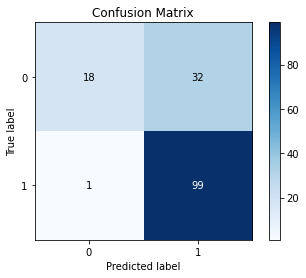

In [15]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypred = clf.predict(Xtest)
print(clf.predict(Xtest))
print(clf.score(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()
# scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred, normalize=True)
# plt.show()

In [ ]:
#extra trees

In [35]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1, random_state=42)
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))


0.8984375


[1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.8333333333333334
[[ 25  25]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        50
           1       0.80      1.00      0.89       100

    accuracy                           0.83       150
   macro avg       0.90      0.75      0.78       150
weighted avg       0.87      0.83      0.81       150



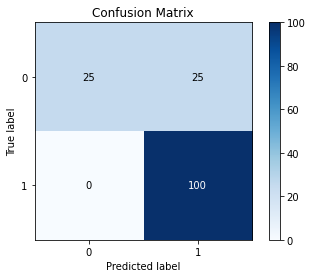

In [36]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypred = clf.predict(Xtest)
print(clf.predict(Xtest))
print(clf.score(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()
# scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred, normalize=True)
# plt.show()

In [ ]:
#ANN

In [27]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1)

from keras.models import Model
import numpy
from keras.layers import Input
from keras.layers import Dense

trainX = numpy.array(X_train)

visible = Input(shape=(10,))
c1 = Dense(8, activation='relu')(visible)
h1 = Dense(16, activation='relu')(c1)
h2 = Dense(32, activation='relu')(h1)
h3 = Dense(64, activation='relu')(h2)
h4 = Dense(64, activation='relu')(h3)
h5 = Dense(32, activation='relu')(h4)
h6 = Dense(16, activation='relu')(h5)
c2 = Dense(8, activation='relu')(h6)
s1 = Dense(1,activation='sigmoid')(c2)

model = Model(inputs=visible,outputs=s1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot_model(model, show_shapes=True, to_file='ensemble.png')

model.fit(trainX,y= numpy.array(y_train), epochs=50)
model.save("/content/drive/MyDrive/ensembleResnetModel1.h5")
print(model.evaluate(numpy.array(X_test),numpy.array(y_test)))


Epoch 1/50
180/180 [==============================] - 1s 1ms/step - loss: 0.4449 - accuracy: 0.8355
Epoch 2/50
180/180 [==============================] - 0s 1ms/step - loss: 0.2092 - accuracy: 0.9179
Epoch 3/50
180/180 [==============================] - 0s 1ms/step - loss: 0.1995 - accuracy: 0.9234
Epoch 4/50
180/180 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9233
Epoch 5/50
180/180 [==============================] - 0s 1ms/step - loss: 0.1880 - accuracy: 0.9272
Epoch 6/50
180/180 [==============================] - 0s 1ms/step - loss: 0.1978 - accuracy: 0.9205
Epoch 7/50
180/180 [==============================] - 0s 1ms/step - loss: 0.1823 - accuracy: 0.9277
Epoch 8/50
180/180 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.9260
Epoch 9/50
180/180 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9285
Epoch 10/50
180/180 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9194

5/5 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8667
[0.33644533157348633, 0.8666666746139526]
[[32 18]
 [ 2 98]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76        50
           1       0.84      0.98      0.91       100

    accuracy                           0.87       150
   macro avg       0.89      0.81      0.83       150
weighted avg       0.88      0.87      0.86       150



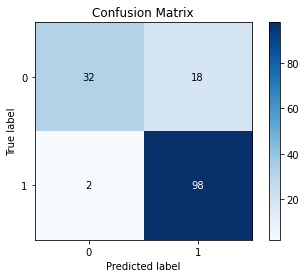

In [28]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypredict = model.predict(Xtest)
Ypred =[]
for i in Ypredict:
  if i<0.5:
    Ypred.append(0)
  else:
    Ypred.append(1)
print(model.evaluate(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()

In [29]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1)

from keras.models import Model
import numpy
from keras.layers import Input
from keras.layers import Dense

trainX = numpy.array(X_train)

visible = Input(shape=(10,))
c1 = Dense(8, activation='relu')(visible)
h1 = Dense(16, activation='relu')(c1)
h2 = Dense(32, activation='relu')(h1)
h3 = Dense(64, activation='relu')(h2)
h4 = Dense(64, activation='relu')(h3)
h5 = Dense(32, activation='relu')(h4)
h6 = Dense(16, activation='relu')(h5)
c2 = Dense(8, activation='relu')(h6)
s1 = Dense(1,activation='sigmoid')(c2)

model = Model(inputs=visible,outputs=s1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot_model(model, show_shapes=True, to_file='ensemble.png')

model.fit(trainX,y= numpy.array(y_train), epochs=40)
model.save("/content/drive/MyDrive/ensembleResnetModel2.h5")
print(model.evaluate(numpy.array(X_test),numpy.array(y_test)))


Epoch 1/40
180/180 [==============================] - 1s 1ms/step - loss: 0.5033 - accuracy: 0.8363
Epoch 2/40
180/180 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.9164
Epoch 3/40
180/180 [==============================] - 0s 1ms/step - loss: 0.1965 - accuracy: 0.9203
Epoch 4/40
180/180 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9248
Epoch 5/40
180/180 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.9115
Epoch 6/40
180/180 [==============================] - 0s 1ms/step - loss: 0.1817 - accuracy: 0.9276
Epoch 7/40
180/180 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy: 0.9097
Epoch 8/40
180/180 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9215
Epoch 9/40
180/180 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9253
Epoch 10/40
180/180 [==============================] - 0s 2ms/step - loss: 0.1921 - accuracy: 0.9204

5/5 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8733
[0.32367968559265137, 0.8733333349227905]
[[32 18]
 [ 1 99]]
              precision    recall  f1-score   support

           0       0.97      0.64      0.77        50
           1       0.85      0.99      0.91       100

    accuracy                           0.87       150
   macro avg       0.91      0.81      0.84       150
weighted avg       0.89      0.87      0.87       150



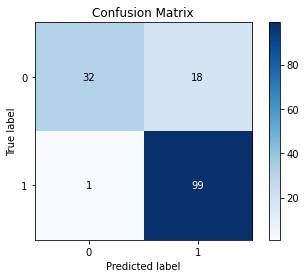

In [30]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypredict = model.predict(Xtest)
Ypred =[]
for i in Ypredict:
  if i<0.5:
    Ypred.append(0)
  else:
    Ypred.append(1)
print(model.evaluate(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()

In [31]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1)

from keras.models import Model
import numpy
from keras.layers import Input
from keras.layers import Dense

trainX = numpy.array(X_train)

visible = Input(shape=(10,))
c1 = Dense(8, activation='relu')(visible)
h1 = Dense(16, activation='relu')(c1)
h2 = Dense(32, activation='relu')(h1)
h3 = Dense(64, activation='relu')(h2)
h4 = Dense(64, activation='relu')(h3)
h5 = Dense(32, activation='relu')(h4)
h6 = Dense(16, activation='relu')(h5)
c2 = Dense(8, activation='relu')(h6)
s1 = Dense(1,activation='sigmoid')(c2)

model = Model(inputs=visible,outputs=s1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot_model(model, show_shapes=True, to_file='ensemble.png')

model.fit(trainX,y= numpy.array(y_train), epochs=30)
model.save("/content/drive/MyDrive/ensembleResnetModel3.h5")
print(model.evaluate(numpy.array(X_test),numpy.array(y_test)))


Epoch 1/30
180/180 [==============================] - 1s 2ms/step - loss: 0.3937 - accuracy: 0.8749
Epoch 2/30
180/180 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9183
Epoch 3/30
180/180 [==============================] - 0s 1ms/step - loss: 0.1983 - accuracy: 0.9237
Epoch 4/30
180/180 [==============================] - 0s 1ms/step - loss: 0.1986 - accuracy: 0.9207
Epoch 5/30
180/180 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9219
Epoch 6/30
180/180 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9201
Epoch 7/30
180/180 [==============================] - 0s 1ms/step - loss: 0.1792 - accuracy: 0.9270
Epoch 8/30
180/180 [==============================] - 0s 1ms/step - loss: 0.1861 - accuracy: 0.9298
Epoch 9/30
180/180 [==============================] - 0s 1ms/step - loss: 0.1839 - accuracy: 0.9290
Epoch 10/30
180/180 [==============================] - 0s 1ms/step - loss: 0.1898 - accuracy: 0.9227

5/5 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8467
[0.36166128516197205, 0.846666693687439]
[[28 22]
 [ 1 99]]
              precision    recall  f1-score   support

           0       0.97      0.56      0.71        50
           1       0.82      0.99      0.90       100

    accuracy                           0.85       150
   macro avg       0.89      0.78      0.80       150
weighted avg       0.87      0.85      0.83       150



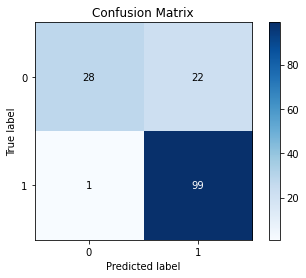

In [32]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypredict = model.predict(Xtest)
Ypred =[]
for i in Ypredict:
  if i<0.5:
    Ypred.append(0)
  else:
    Ypred.append(1)
print(model.evaluate(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()

In [ ]:
#Adaboost

In [41]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))


0.896875


[1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.7866666666666666
[[ 18  32]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        50
           1       0.76      1.00      0.86       100

    accuracy                           0.79       150
   macro avg       0.88      0.68      0.70       150
weighted avg       0.84      0.79      0.75       150



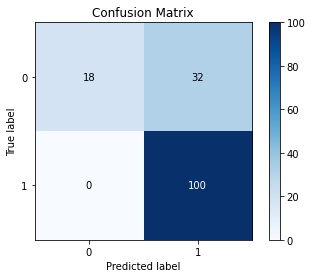

In [42]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypred = clf.predict(Xtest)
print(clf.predict(Xtest))
print(clf.score(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()
# scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred, normalize=True)
# plt.show()

In [ ]:
#Bagging

In [49]:
Xtrain = []
Y = []
with open('/content/drive/MyDrive/inputResnetPred.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtrain.append(x)
        if int(row[10]) == 1:
          Y.append(0)
        elif int(row[10]) == 0:
          Y.append(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Y, test_size=0.1, random_state=42)
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
clf = BaggingClassifier(ExtraTreesClassifier(n_estimators=100))
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))


0.8984375


[1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
0.82
[[ 23  27]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        50
           1       0.79      1.00      0.88       100

    accuracy                           0.82       150
   macro avg       0.89      0.73      0.76       150
weighted avg       0.86      0.82      0.80       150



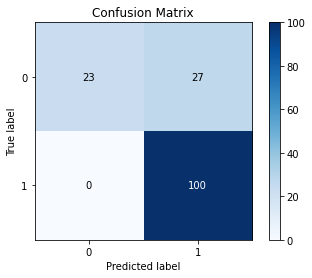

In [50]:
Xtest = []
Ytest = []
with open('/content/drive/MyDrive/inputResnetPredTest.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        # print(row)
        x = []
        for j in range(0,10):

            x.append(float(row[j]))
        Xtest.append(x)
        if int(row[10]) == 1:
          Ytest.append(0)
        elif int(row[10]) == 0:
          Ytest.append(1)

Ypred = clf.predict(Xtest)
print(clf.predict(Xtest))
print(clf.score(Xtest,Ytest))
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot
import matplotlib.pyplot as plt

mat = confusion_matrix(Ytest, Ypred)
print(mat)
print(classification_report(Ytest, Ypred))
scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred)
plt.show()
# scikitplot.metrics.plot_confusion_matrix(Ytest, Ypred, normalize=True)
# plt.show()